240
240


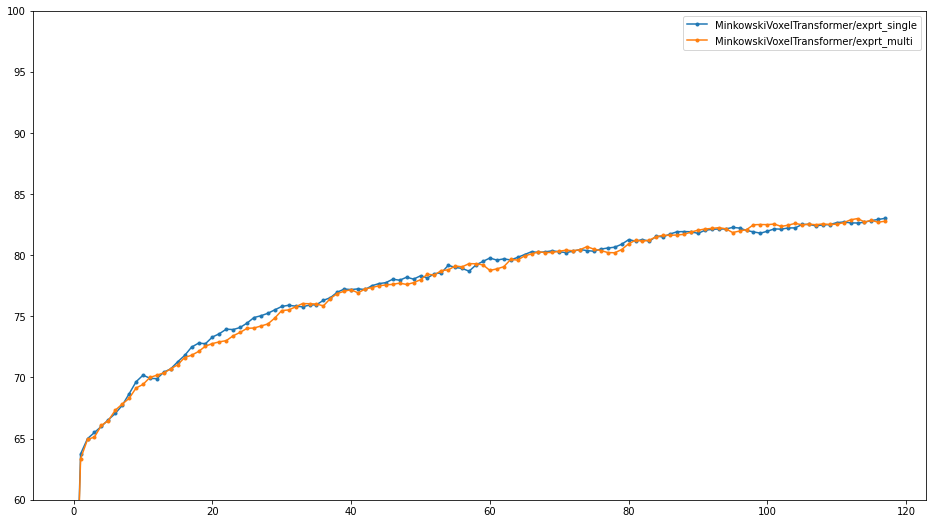

In [14]:
import numpy as np
import os
import re
from matplotlib import pyplot as plt

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


base_dir = "/home/zhaotianchen/project/zns-dir/SpatioTemporalSegmentation-ScanNet/outputs/ScannetSparseVoxelizationDataset/"

'''read from logs'''
log_dirs = [
            'MinkowskiVoxelTransformer/exprt_single',
            'MinkowskiVoxelTransformer/exprt_multi',
           ]

loss_d = {}

PLOT_TYPE = 'score'
# PLOT_TYPE = 'iou'
# PLOT_TYPE = 'class_iou'

for log_dir in log_dirs:

    filepath = os.path.join(base_dir, log_dir, 'model.log')
    with open(filepath, 'r') as f:
        lines = f.readlines()
    # get the last run
    last_idx = 0
    for idx, l in enumerate(lines):
        if 'training' in l:
#             pass
#             print(idx, l)
            last_idx = idx
    lines = lines[last_idx:]
    datas = []
    for l in lines:

        if PLOT_TYPE == 'score':
            if re.search('Score', l) is not None:
                match =  re.search('Score\ (?P<score>.*)Data',l)
                if match is not None:
                    cur_data = (float(match.group('score')))
                    datas.append(cur_data)
                    
        elif PLOT_TYPE == 'iou':    
            if re.search('IoU', l) is not None:
#                 match =  re.search('IOU\ (?P<score>.*)mAP',l)
                match =  re.search('IoU:\ (?P<score>.*)\n',l)
                if match is not None:
                    cur_data = (float(match.group('score')))
                    datas.append(cur_data)
                    
        elif PLOT_TYPE == 'class_iou':
            if re.search('Class', l) is not None:
                match =  re.search('Class\ (?P<class_ids>.*)\ \:(?P<iou>.*)\n',l)
                print(float(match.group('class_ids')),match.group('iou'))
            
        
    # print(datas)
    loss_d[log_dir] = datas
 
# multi
loss_d[log_dirs[1]] = loss_d[log_dirs[1]][0::2]

fig, ax = plt.subplots(figsize=[16., 9.])
for k in loss_d:
    
#     if '2' in k or 'test' in k or '3' in k:
    print(len(loss_d[k]))
    loss_d[k] = loss_d[k][::2]
    ax.plot(moving_average(loss_d[k][:],3), marker='.', label=k)
ax.legend()  

if PLOT_TYPE == 'score':
    plt.ylim(60,100)
elif PLOT_TYPE == 'iou':
    plt.ylim(0,70)